In [ ]:
# import tensorflow as tf
 
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [ ]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)    # tf1 --> tf.set_random_seed(seed)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 프레임 설정
model = Sequential()
#kernel_initializer='random_uniform','normal','glorot_normal(xavier)',
#  'glorot_uniform','he_normal','lecun_normal','he_uniform'
model.add(Dense(512, kernel_initializer='he_normal',
                input_dim=784, activation='relu'))
#model.add(Dense(100, kernel_initializer='he_normal', activation='relu'))
#model.add(Dense(200, kernel_initializer='he_normal', activation='relu'))
#model.add(Dense(50, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(10, kernel_initializer='he_normal', activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model1/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5) # 10보다 더 빨리 학습종료됨
#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20) # 10보다 더 오래 학습진행됨

In [ ]:
%%time
# 모델의 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=128, verbose=1, 
                    callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30
468/469 [============================>.] - ETA: 0s - loss: 0.2629 - accuracy: 0.9256
Epoch 00001: val_loss improved from inf to 0.14441, saving model to ./model1/01-0.1444.hdf5
469/469 [==============================] - 4s 5ms/step - loss: 0.2626 - accuracy: 0.9257 - val_loss: 0.1444 - val_accuracy: 0.9573
Epoch 2/30
467/469 [============================>.] - ETA: 0s - loss: 0.1076 - accuracy: 0.9686
Epoch 00002: val_loss improved from 0.14441 to 0.09216, saving model to ./model1/02-0.0922.hdf5
469/469 [==============================] - 2s 4ms/step - loss: 0.1074 - accuracy: 0.9687 - val_loss: 0.0922 - val_accuracy: 0.9710
Epoch 3/30
458/469 [============================>.] - ETA: 0s - loss: 0.0695 - accuracy: 0.9799
Epoch 00003: val_loss improved from 0.09216 to 0.07662, saving model to ./model1/03-0.0766.hdf5
469/469 [==============================] - 2s 4ms/step - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0766 - val_accuracy: 0.9762
Epoch 4/30
467/469 [===============

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9811

 Test Accuracy: 0.9811


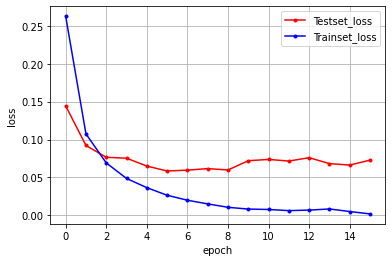

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 학습된 Model 저장 & 로딩

In [ ]:
model.save('soomodel.h5')
del model

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 2.3520 - accuracy: 0.0900

 Test Accuracy: 0.0900


In [ ]:
# 모델 불러오기
from keras.models import load_model
model = load_model('soomodel.h5')

# 모델 사용하기
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9811

 Test Accuracy: 0.9811


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_loss:', test_loss)
print('test_acc:', test_acc)  # 0.9811

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9811
test_loss: 0.07283246517181396
test_acc: 0.9811000227928162
